Hospital_Mortality_Analysis

In [1]:
# Importing the Libraries
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset
df=pd.read_csv('data01.csv')

In [3]:
df.describe()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
count,1177.000000,1177.000000,1176.000000,1177.000000,1177.000000,962.000000,1177.000000,1177.000000,1177.000000,1177.000000,...,1177.000000,1176.000000,1177.000000,1177.000000,1177.000000,885.000000,1177.000000,948.000000,883.000000,1177.000000
mean,1.299065,150778.120646,0.135204,74.055225,1.525064,30.188278,0.717927,0.451147,0.085811,0.421410,...,138.890016,8.500894,102.283835,13.925094,2.120169,7.378532,26.911766,1.853426,45.535382,48.715378
std,0.458043,29034.669513,0.342087,13.434061,0.499584,9.325997,0.450200,0.497819,0.280204,0.493995,...,4.151347,0.572263,5.339733,2.652732,0.251532,0.067320,5.167512,0.983819,12.711271,12.868436
min,1.000000,100213.000000,0.000000,19.000000,1.000000,13.346801,0.000000,0.000000,0.000000,0.000000,...,114.666667,6.700000,80.266667,6.636364,1.400000,7.090000,12.857143,0.500000,18.750000,15.000000
25%,1.000000,125603.000000,0.000000,65.000000,1.000000,24.326461,0.000000,0.000000,0.000000,0.000000,...,136.666667,8.148864,99.000000,12.250000,1.955556,7.334615,23.454545,1.200000,37.038462,40.000000
50%,1.000000,151901.000000,0.000000,77.000000,2.000000,28.312474,1.000000,0.000000,0.000000,0.000000,...,139.250000,8.500000,102.500000,13.666667,2.092308,7.380000,26.500000,1.600000,43.000000,55.000000
75%,2.000000,176048.000000,0.000000,85.000000,2.000000,33.633509,1.000000,1.000000,0.000000,1.000000,...,141.600000,8.869063,105.571429,15.416667,2.241667,7.430000,29.875000,2.200000,50.585784,55.000000
max,2.000000,199952.000000,1.000000,99.000000,2.000000,104.970366,1.000000,1.000000,1.000000,1.000000,...,154.736842,10.950000,122.526316,25.500000,4.072727,7.580000,47.666667,8.333333,98.600000,75.000000


In [4]:
# Checking null values
df.isnull().sum()


group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

                             group        ID   outcome       age   gendera  \
group                     1.000000  0.001859 -0.024220  0.000077  0.011808   
ID                        0.001859  1.000000  0.040398 -0.026546 -0.030853   
outcome                  -0.024220  0.040398  1.000000  0.064510 -0.022690   
age                       0.000077 -0.026546  0.064510  1.000000  0.081705   
gendera                   0.011808 -0.030853 -0.022690  0.081705  1.000000   
BMI                      -0.041432  0.046694 -0.062086 -0.384185  0.024556   
hypertensive             -0.052413 -0.001704 -0.072441  0.177060  0.008776   
atrialfibrillation       -0.002997 -0.014781  0.100975  0.291003 -0.036957   
CHD with no MI            0.005263  0.035383 -0.014694  0.037594 -0.079159   
diabetes                  0.025042  0.016410 -0.049997 -0.089103 -0.035943   
deficiencyanemias         0.006558 -0.027295 -0.099513  0.015099  0.080868   
depression                0.023679  0.029687 -0.060883 -0.094543

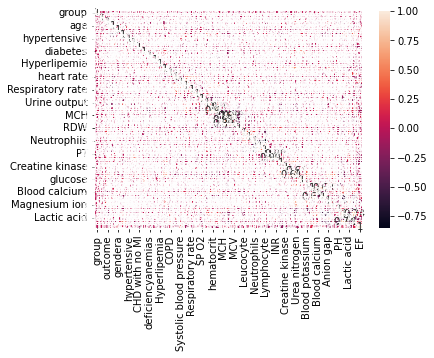

In [5]:
# Finding the co-relation Matrix & also plotting a heatmap for better understanding
import seaborn as sns
corr_matrix=df.corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True)
plt.show()

<AxesSubplot:xlabel='outcome', ylabel='age'>

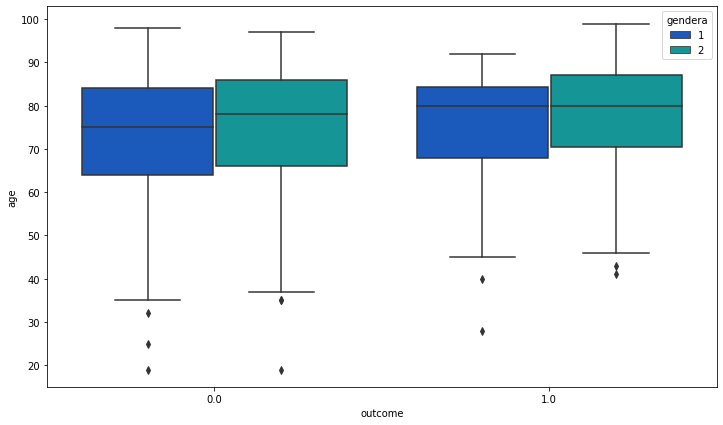

In [6]:
# Plotting a box plot to find co-relation so that null values can be imputed viz. mean, median, mode
# It can be seen that at higher age probability of death is more, which is true 
plt.figure(figsize=(12, 7))
sns.boxplot(x='outcome',y='age',data=df,palette='winter',hue='gendera')

In [7]:
# Filling all the null values by median
df.fillna(df.median(),inplace=True)

<AxesSubplot:>

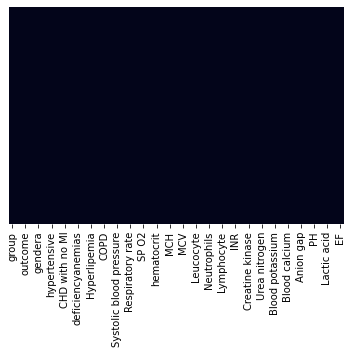

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [9]:
# It can be observed that people above age 60 are more likely to get atrialfibrillation than their younger counterparts
import plotly.express as px
fig1 = px.scatter(df, x="heart rate",y="Respiratory rate", color="age", facet_col="gendera", facet_row="atrialfibrillation")
fig1.show()

In [10]:
# More number of renal failure has occurred when BMI is in the range of 25-30, also the person is more likely to have diabetes if he / she is falling in this range
fig2 = px.scatter(df, x="BMI",y="Systolic blood pressure", color="age", facet_col="Renal failure", facet_row="diabetes")
fig2.show()

In [11]:
# Train_Test_Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('outcome',axis=1), df['outcome'], test_size=0.20,random_state=42) 


In [12]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(941, 50) (236, 50)
(941,) (236,)


In [13]:
# Using LogisticRegression and predicting the outcome
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='lbfgs')
logmodel.fit(X_train,y_train)
y_pred = logmodel.predict(X_test)

C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [14]:
y_pred[0:50]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
# Recall
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average=None)
# Precision
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)

array([0.84549356, 0.66666667])

In [16]:
# Final_Output
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91       198
         1.0       0.67      0.05      0.10        38

    accuracy                           0.84       236
   macro avg       0.76      0.52      0.51       236
weighted avg       0.82      0.84      0.78       236

